In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Базовая часть

## 1

In [4]:
def diff2(x_0, h, f):
    return (f(x_0 + h) - f(x_0 - h)) / (2*h)

## 2

In [5]:
def g1(x):
    return x * np.exp(x)

def g3(x):
    return np.sin(np.pi/x)

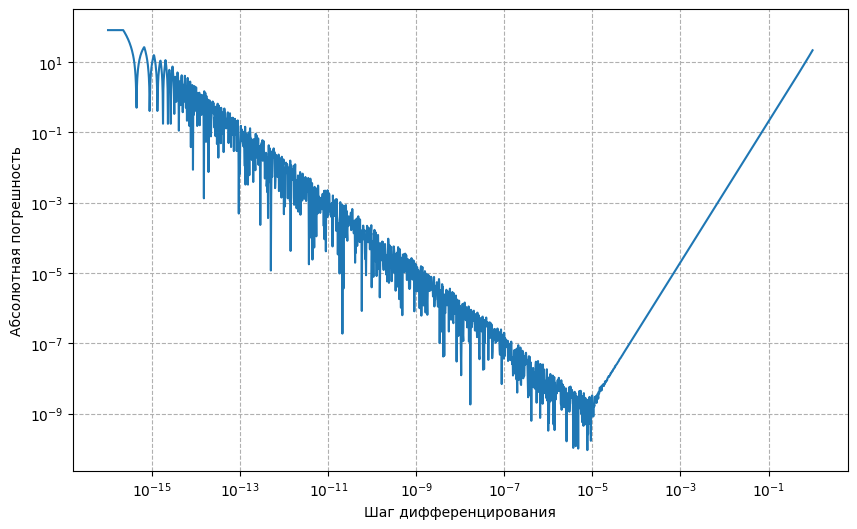

In [6]:
# для g1
x_0 = 3
h_a = -16
h_b = 0
h_n = 2000

# точное значение производной для абсолютной погрешности
exact_derivative_g1 = np.exp(x_0) * (1 + x_0)

# сетка значений h
h_nodes = np.logspace(h_a, h_b, h_n)

abs_err = [ np.abs(exact_derivative_g1 - diff2(x_0, h, g1)) for h in h_nodes ]

plt.figure(figsize=(10, 6))
plt.loglog(h_nodes, abs_err)
plt.xlabel('Шаг дифференцирования')
plt.ylabel('Абсолютная погрешность')
plt.grid(True, which="both", ls="--")

plt.show()

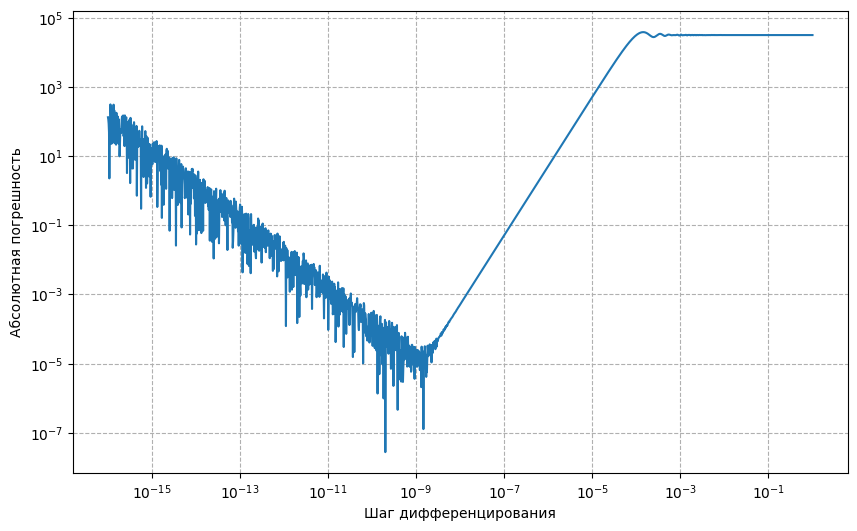

In [7]:
# для g3
x_0 = 0.01
h_a = -16
h_b = 0
h_n = 2000

# точное значение производной для абсолютной погрешности
exact_derivative_g3 = - (np.pi * np.cos(np.pi/x_0)) / (x_0**2)

# сетка значений h
h_nodes = np.logspace(h_a, h_b, h_n)

abs_err = [ np.abs(exact_derivative_g3 - diff2(x_0, h, g3)) for h in h_nodes ]

plt.figure(figsize=(10, 6))
plt.loglog(h_nodes, abs_err)
plt.xlabel('Шаг дифференцирования')
plt.ylabel('Абсолютная погрешность')
plt.grid(True, which="both", ls="--")

plt.show()

## 3

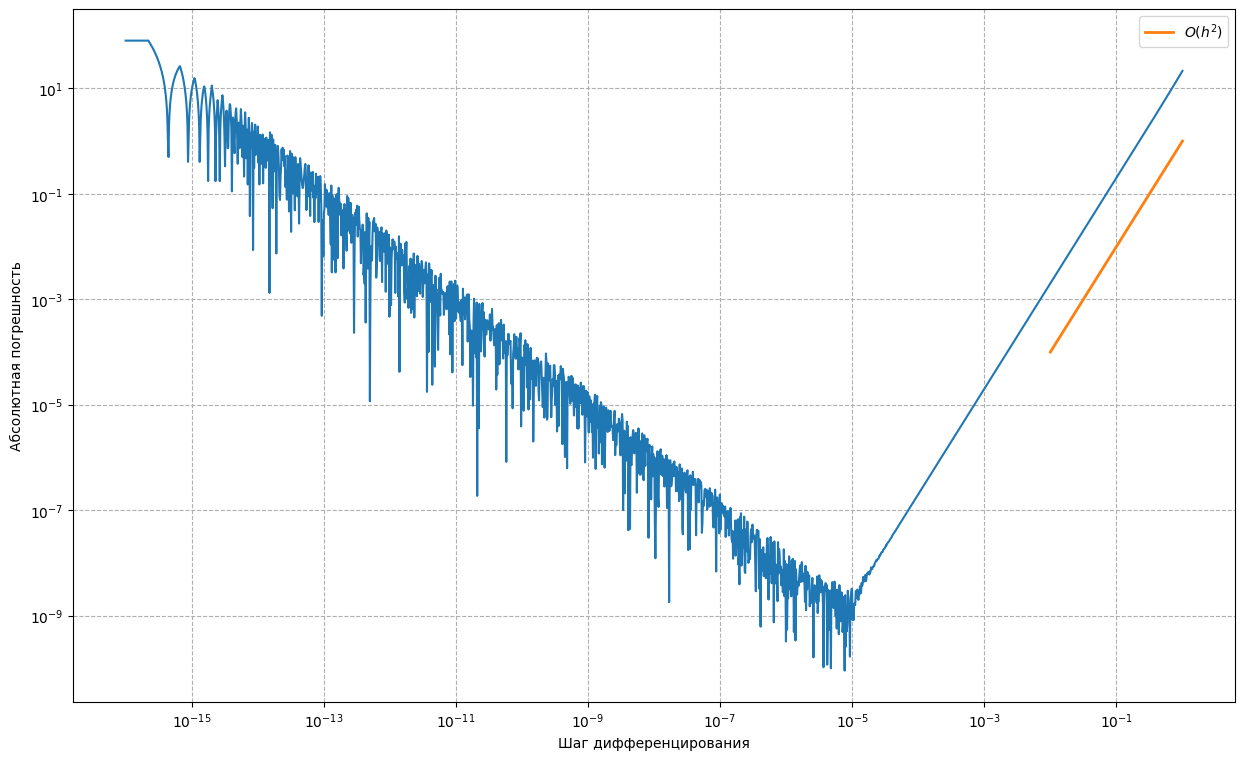

In [21]:
# для g1
x_0 = 3
h_a = -16
h_b = 0
h_n = 2000

# точное значение производной для абсолютной погрешности
exact_derivative_g1 = np.exp(x_0) * (1 + x_0)

# сетка значений h
h_nodes = np.logspace(h_a, h_b, h_n)

abs_err = [ np.abs(exact_derivative_g1 - diff2(x_0, h, g1)) for h in h_nodes ]

h2 = [h**2 for h in np.logspace(-2, 0, 500)]

plt.figure(figsize=(15, 9))

plt.loglog(h_nodes, abs_err)
plt.loglog(np.logspace(-2, 0, 500), h2, linewidth=2, label=r'$O(h^2)$')

plt.xlabel('Шаг дифференцирования')
plt.ylabel('Абсолютная погрешность')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.show()

## 4

In [24]:
def composite_simpson(a, b, n, f):

    h = (b - a) / n
    x_nodes = np.linspace(a, b, n+1)

    result = f(x_nodes[0]) + f(x_nodes[-1])
    result += 2 * np.sum(f(x_nodes[2:-1:2]))
    result += 4 * np.sum(f(x_nodes[1::2]))

    return result * h / 3

## 5

In [25]:
def g2(x):
    return x**2 * np.sin(3*x)

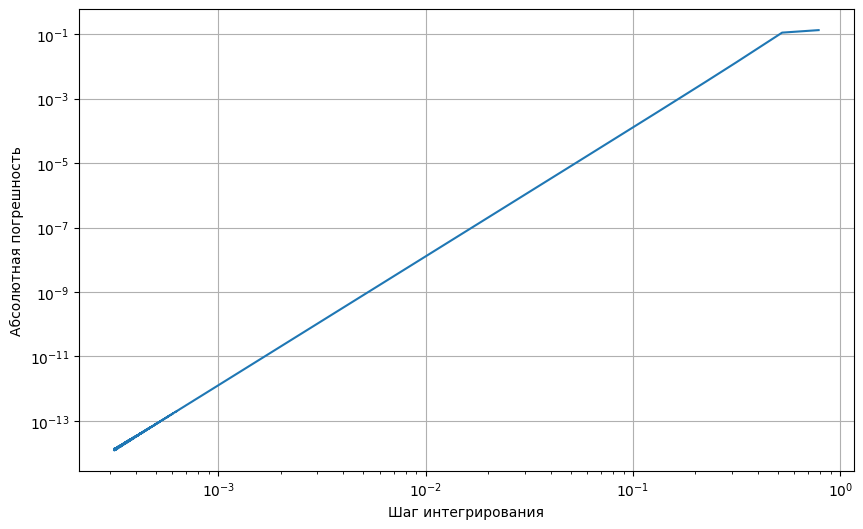

In [26]:
# для g2
a = 0
b = np.pi

# точное значение интеграла для абсолютной погрешности
exact_integral_g2 = np.pi**2 / 3 - 4/27

# сетка значений n
n_values = np.arange(4, 10000, 2)  # 4, 6, ..., 9998
h_values = (b - a) / n_values

abs_err = [ np.abs(exact_integral_g2 - composite_simpson(a, b, n, g2)) for n in n_values ]

plt.figure(figsize=(10, 6))
plt.loglog(h_values, abs_err)
plt.xlabel('Шаг интегрирования')
plt.ylabel('Абсолютная погрешность')
plt.grid(True)
plt.show()

<ipython-input-27-05d386e18b9d>:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  exact_integral_g3, _ = quad(lambda t: np.sin(t)/t**2, np.pi, np.pi/eps)


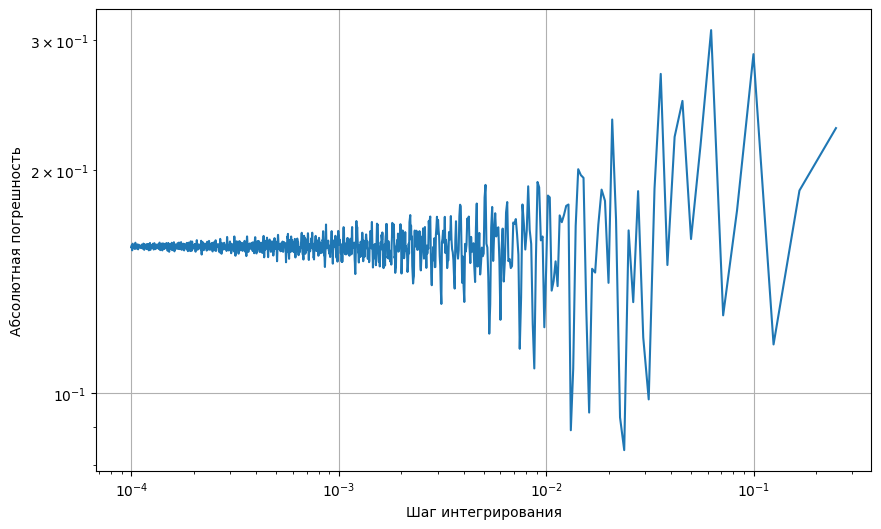

In [27]:
# для g3
eps = 0.001
a = eps
b = 1

# точное значение интеграла
eps = 0.001
exact_integral_g3, _ = quad(lambda t: np.sin(t)/t**2, np.pi, np.pi/eps)

# сетка значений n
n_values = np.arange(4, 10000, 2)  # 4, 6, ..., 9998
h_values = (b - a) / n_values

abs_err = [ np.abs(exact_integral_g3 - composite_simpson(a, b, n, g3)) for n in n_values ]

plt.figure(figsize=(10, 6))
plt.loglog(h_values, abs_err)
plt.xlabel('Шаг интегрирования')
plt.ylabel('Абсолютная погрешность')
plt.grid(True)
plt.show()

## 6


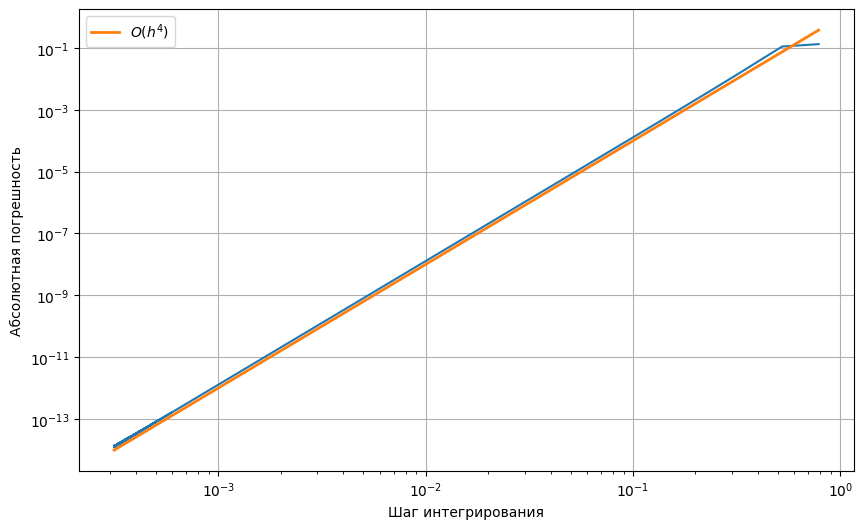

In [30]:
a = 0
b = np.pi

# точное значение интеграла для абсолютной погрешности
exact_integral_g2 = np.pi**2 / 3 - 4/27

# сетка значений n
n_values = np.arange(4, 10000, 2)  # 4, 6, ..., 9998
h_values = (b - a) / n_values

abs_err = [ np.abs(exact_integral_g2 - composite_simpson(a, b, n, g2)) for n in n_values ]
h4 = [h**4 for h in h_values]


plt.figure(figsize=(10, 6))
plt.loglog(h_values, abs_err)
plt.loglog(h_values, h4, linewidth=2, label=r'$O(h^4)$')
plt.xlabel('Шаг интегрирования')
plt.ylabel('Абсолютная погрешность')
plt.legend()
plt.grid(True)
plt.show()

# Продвинутая часть

## 8

In [33]:
def diff4(x_0, h, f):
    return (f(x_0 - 2*h) - 8*f(x_0 - h) + 8*f(x_0 + h) - f(x_0 + 2*h)) / (12*h)

## 9

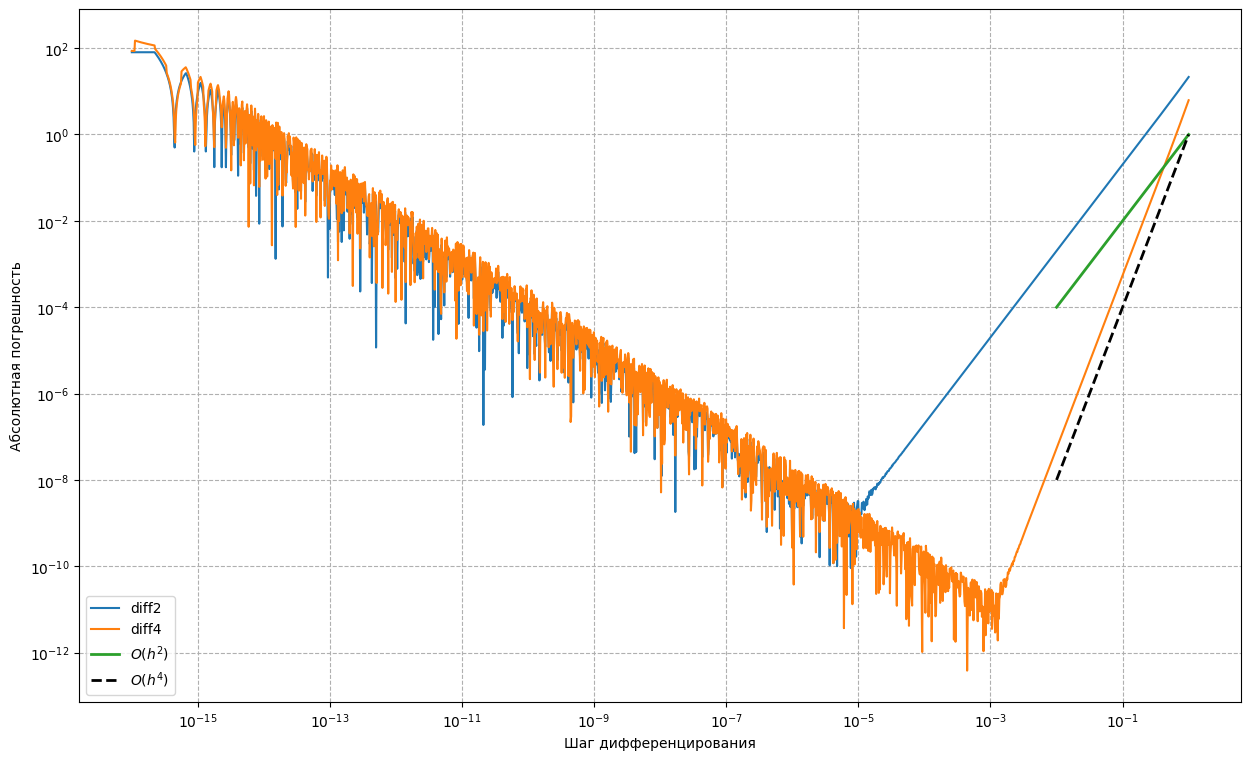

In [37]:
# для g1
x_0 = 3
h_a = -16
h_b = 0
h_n = 2000

# точное значение производной для абсолютной погрешности
exact_derivative_g1 = np.exp(x_0) * (1 + x_0)

# сетка значений h
h_nodes = np.logspace(h_a, h_b, h_n)

abs_err_diff2 = [ np.abs(exact_derivative_g1 - diff2(x_0, h, g1)) for h in h_nodes ]
abs_err_diff4 = [ np.abs(exact_derivative_g1 - diff4(x_0, h, g1)) for h in h_nodes ]

h2 = [h**2 for h in np.logspace(-2, 0, 500)]
h4 = [h**4 for h in np.logspace(-2, 0, 500)]

plt.figure(figsize=(15, 9))

plt.loglog(h_nodes, abs_err_diff2, label='diff2')
plt.loglog(h_nodes, abs_err_diff4, label='diff4')

plt.loglog(np.logspace(-2, 0, 500), h2, linewidth=2, label=r'$O(h^2)$')
plt.loglog(np.logspace(-2, 0, 500), h4, linewidth=2, label=r'$O(h^4)$', color='black', ls="--")

plt.xlabel('Шаг дифференцирования')
plt.ylabel('Абсолютная погрешность')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.show()

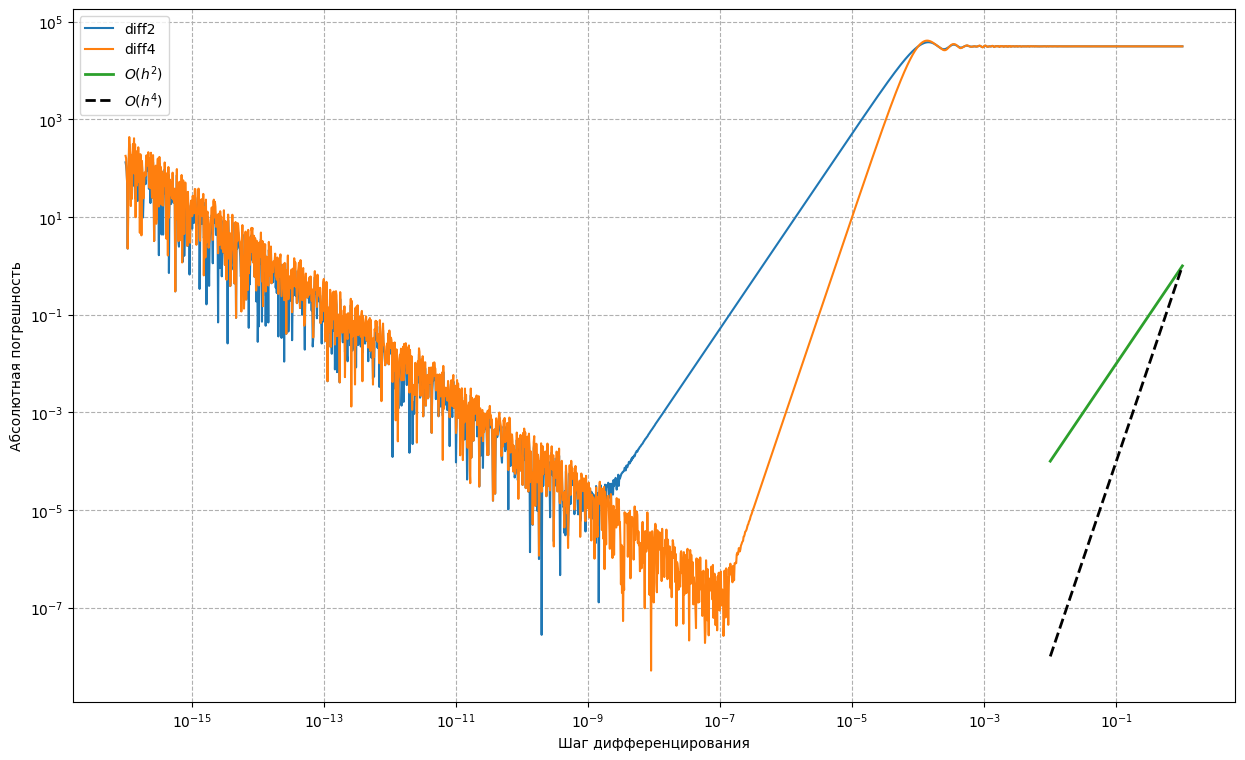

In [39]:
# для g3
x_0 = 0.01
h_a = -16
h_b = 0
h_n = 2000

# точное значение производной для абсолютной погрешности
exact_derivative_g3 = - (np.pi * np.cos(np.pi/x_0)) / (x_0**2)

# сетка значений h
h_nodes = np.logspace(h_a, h_b, h_n)

abs_err_diff2 = [ np.abs(exact_derivative_g3 - diff2(x_0, h, g3)) for h in h_nodes ]
abs_err_diff4 = [ np.abs(exact_derivative_g3 - diff4(x_0, h, g3)) for h in h_nodes ]

h2 = [h**2 for h in np.logspace(-2, 0, 500)]
h4 = [h**4 for h in np.logspace(-2, 0, 500)]

plt.figure(figsize=(15, 9))

plt.loglog(h_nodes, abs_err_diff2, label='diff2')
plt.loglog(h_nodes, abs_err_diff4, label='diff4')

plt.loglog(np.logspace(-2, 0, 500), h2, linewidth=2, label=r'$O(h^2)$')
plt.loglog(np.logspace(-2, 0, 500), h4, linewidth=2, label=r'$O(h^4)$', color='black', ls="--")

plt.xlabel('Шаг дифференцирования')
plt.ylabel('Абсолютная погрешность')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.show()

## 12

In [40]:
def gauss_quad5(f, a=-1, b=1):
    # узлы и веса для стандартного интервала [-1, 1]
    nodes = [-np.sqrt(3/5), 0, np.sqrt(3/5)]
    weights = [5/9, 8/9, 5/9]

    # преобразование узлов к интервалу [a, b]
    if a != -1 or b != 1:
        nodes = [0.5*(a + b) + 0.5*(b - a)*x for x in nodes]

    return 0.5*(b - a) * sum(w * f(x) for x, w in zip(nodes, weights))

## 13

In [56]:
# генерация случайных полиномов степеней от 0 до 6
np.random.seed(42)
polynoms = []
for n in range(7):
    coeffs = np.random.randn(n + 1) * 10 - 5
    polynoms.append(np.poly1d(coeffs))

In [58]:
print(*polynoms)

 
-0.03286  
-6.383 x + 1.477        2
10.23 x - 7.342 x - 7.341        3         2
10.79 x + 2.674 x - 9.695 x + 0.4256         4         3        2
-9.634 x - 9.657 x - 2.58 x - 24.13 x - 22.25         5         4         3         2
-10.62 x - 15.13 x - 1.858 x - 14.08 x - 19.12 x + 9.656         6         5         4         3         2
-7.258 x - 4.325 x - 19.25 x - 10.44 x - 3.891 x - 16.51 x - 1.243


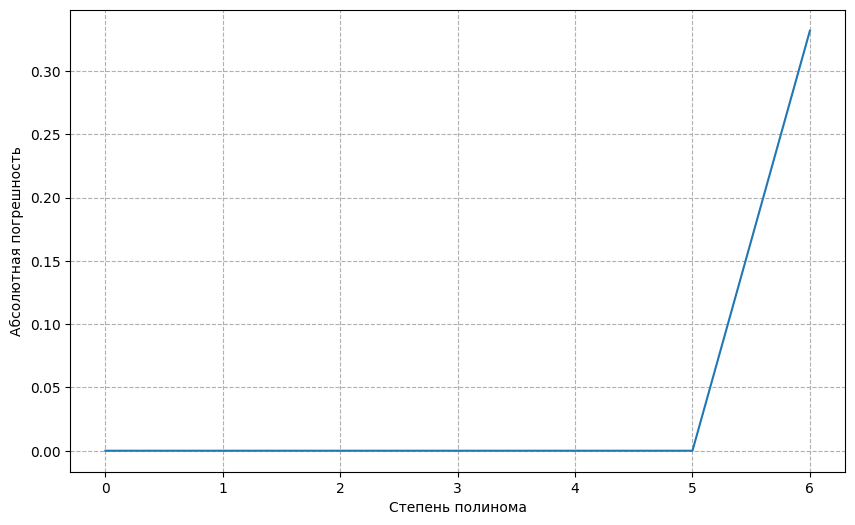

In [60]:
a = 0
b = 2

abs_err = []

for i, poly in enumerate(polynoms):

    exact_integral, _ = quad(poly, a, b)

    gauss_integral = gauss_quad5(poly, a, b)

    abs_err.append(abs(exact_integral - gauss_integral))


plt.figure(figsize=(10, 6))

plt.plot(range(7), abs_err)

plt.xlabel('Степень полинома')
plt.ylabel('Абсолютная погрешность')
plt.grid(True, which="both", ls="--")

plt.show()